In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt

In [2]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
ts = df['Open'].values

In [5]:
ts = ts.reshape(-1,1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
scaler.fit(ts)
ts = scaler.transform(ts)



In [7]:
ts

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
Old = []
New = []
for i in range(60,1258):
    Old.append(ts[i-60:i,0])
    New.append(ts[i, 0])

In [9]:
Old,New = np.array(Old), np.array(New)

In [10]:
New

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [11]:
Old = np.reshape(Old ,(Old.shape[0],Old.shape[1],1))

In [24]:
from keras.models import Sequential


In [25]:
from keras.layers import Dense

In [27]:
from keras.layers import Dropout
from keras.layers import LSTM

In [28]:
regressor = Sequential()

In [31]:
regressor.add(LSTM(units =40, return_sequences=True,input_shape=(Old.shape[1],1)))
regressor.add(Dropout(0.2))

In [33]:
regressor.add(LSTM(units =40, return_sequences=True))
regressor.add(Dropout(0.2))

In [35]:
regressor.add(LSTM(units =40, return_sequences=True))
regressor.add(Dropout(0.2))


In [36]:
regressor.add(LSTM(units =40))

In [37]:
regressor.add(Dense(units=1))

In [38]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [39]:
regressor.fit(Old,New,epochs=120,batch_size=32)

Epoch 1/120
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0656
Epoch 2/120
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 3/120
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0035
Epoch 4/120
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0036
Epoch 5/120
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0035
Epoch 6/120
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0031
Epoch 7/120
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0032
Epoch 8/120
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0030
Epoch 9/120
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0029
Epoch 10/120
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0032
Epoch 11/120
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0026
Epoch 12/120
1198/1198 [==============================] - 5s 4ms/step - l

1198/1198 [==============================] - 5s 4ms/step - loss: 8.0048e-04
Epoch 97/120
1198/1198 [==============================] - 5s 4ms/step - loss: 8.3382e-04
Epoch 98/120
1198/1198 [==============================] - 5s 4ms/step - loss: 8.1260e-04
Epoch 99/120
1198/1198 [==============================] - 5s 4ms/step - loss: 8.6853e-04
Epoch 100/120
1198/1198 [==============================] - 5s 4ms/step - loss: 7.6338e-04
Epoch 101/120
1198/1198 [==============================] - 5s 4ms/step - loss: 6.9583e-04
Epoch 102/120
1198/1198 [==============================] - 5s 4ms/step - loss: 7.2547e-04
Epoch 103/120
1198/1198 [==============================] - 5s 4ms/step - loss: 7.0603e-04
Epoch 104/120
1198/1198 [==============================] - 5s 5ms/step - loss: 8.9192e-04
Epoch 105/120
1198/1198 [==============================] - 5s 4ms/step - loss: 7.4672e-04
Epoch 106/120
1198/1198 [==============================] - 5s 4ms/step - loss: 7.7250e-04
Epoch 107/120
1198/1198 [==

In [40]:
test = pd.read_csv('Google_Stock_Price_Test.csv')

In [41]:
real =test.iloc[:,1:2].values

In [42]:
real

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [46]:
dataset_total = pd.concat((df['Open'], test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)



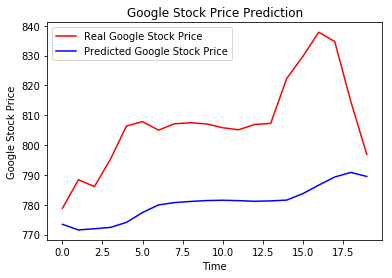

In [49]:
mlt.plot(real, color = 'red', label = 'Real Google Stock Price')
mlt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
mlt.title('Google Stock Price Prediction')
mlt.xlabel('Time')
mlt.ylabel('Google Stock Price')
mlt.legend()
mlt.show()